## EDA of Job Market Performance in the U.S. During the COVID-19 Pandemic

The motivation behind this project stems from my job searching experience during the COVID-19 pandemic as a Class of 2020 University graduate. I was curious, and wanted to gain insight into the unemployment rates over the past decade for various education levels, and explore which industries within the states holding the highest unemployment rates have been the most impacted.

In [252]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mlp
import numpy as np
import seaborn as sns

In [184]:
df = pd.read_csv('./unemployment_data_us.csv')

In [185]:
df.head()

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8


In [186]:
df.columns

Index(['Year', 'Month', 'Primary_School', 'Date', 'High_School',
       'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian',
       'Hispanic', 'Men', 'Women'],
      dtype='object')

In [187]:
df.describe()

,Year,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
count,132.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,2015.000000,9.329268,6.391057,5.338211,3.127642,5.455285,10.692683,4.679675,7.660163,5.848780,5.485366
std,3.174324,3.343178,2.223607,1.895314,0.937585,1.881454,3.615907,1.668363,2.837274,2.160577,1.750910
min,2010.000000,4.800000,3.400000,2.700000,1.900000,3.100000,5.400000,2.100000,3.900000,3.100000,3.100000
25%,2012.000000,6.350000,4.450000,3.700000,2.300000,3.750000,7.400000,3.300000,5.050000,3.950000,3.900000
50%,2015.000000,8.500000,5.500000,4.900000,2.800000,4.800000,10.300000,4.200000,6.800000,5.200000,5.000000
75%,2018.000000,12.250000,8.300000,7.000000,4.000000,7.250000,13.900000,6.050000,10.150000,7.600000,7.400000
max,2020.000000,15.800000,11.000000,8.900000,5.000000,9.000000,16.800000,8.300000,12.900000,10.300000,8.400000


In [188]:
df.columns

Index(['Year', 'Month', 'Primary_School', 'Date', 'High_School',
       'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian',
       'Hispanic', 'Men', 'Women'],
      dtype='object')

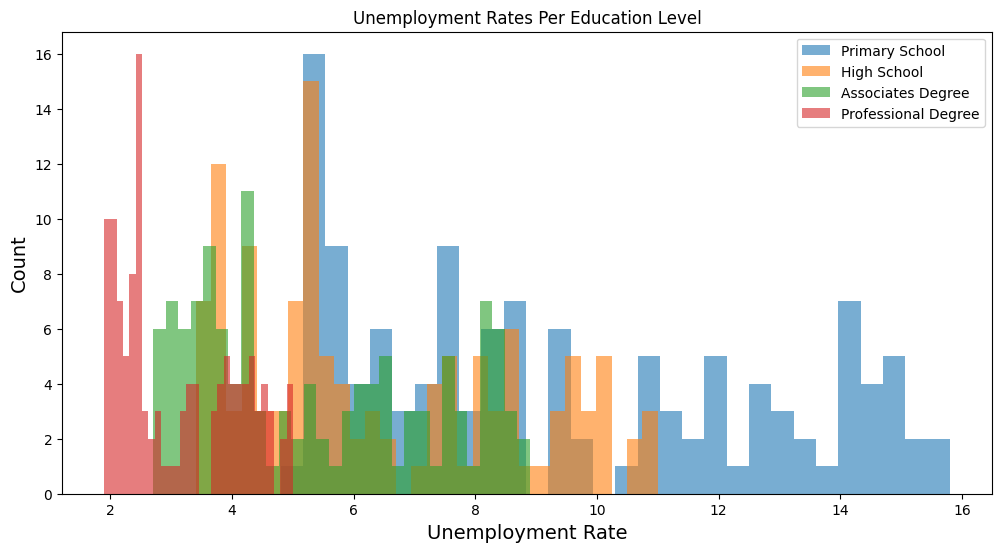

In [209]:
# Histogram to compare unemployment rates at each education level between 2010-2020

plt.figure(figsize=(12,6))
plt.hist(df['Primary_School'], bins=30, alpha=0.6, label="Primary School")
plt.hist(df['High_School'], bins=30, alpha=0.6, label="High School")
plt.hist(df['Associates_Degree'], bins=30, alpha=0.6, label="Associates Degree")
plt.hist(df['Professional_Degree'], bins=30, alpha=0.6, label="Professional Degree")

plt.xlabel("Unemployment Rate", size=14)
plt.ylabel("Count", size=14)
plt.title("Unemployment Rates Per Education Level")
plt.legend(loc='upper right')

The above histogram displaying shows large dispersion predominantly in the unemployment rate of individuals with a Primary School education level. Overall, a right skewness can be observed for each of the respective education levels so it is critical to address that the mode of each data point is closer to the left side. In addition, it suggests that there are a number of data points, possibly outliers that are greater than the mode.

Text(0.5, 0, 'Education Level')

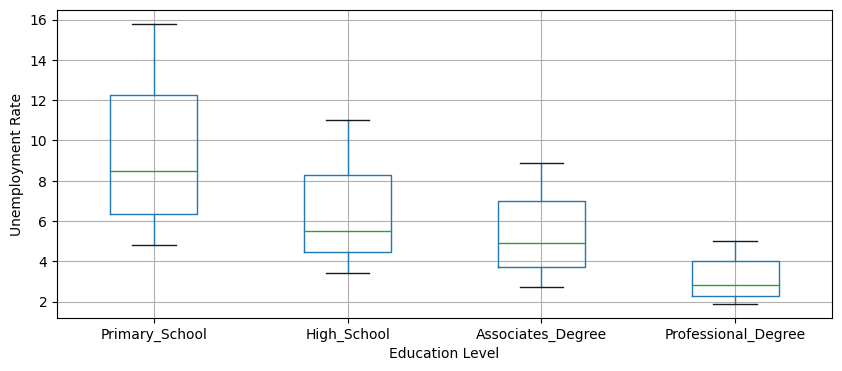

In [277]:
boxplot = df.boxplot(column = ['Primary_School', 'High_School', 'Associates_Degree', 'Professional_Degree'], figsize=(10,4))
boxplot.set_ylabel('Unemployment Rate')
boxplot.set_xlabel('Education Level')


The above boxplot shows a a decreasing trend in the Interquartile Range (IQR) values as the level of education increases. A Primary School education level suggests the largest variability in comparison to the other education levels and holds the highest median unemployment rate of 8.5. This is in stark contrast to the median unemployment rate of 2.8, seen by the Professional Degree holders.

In [178]:
# build correlation matrix 
df[['Primary_School', 'High_School', 'Associates_Degree', 'Professional_Degree']].corr()

,Primary_School,High_School,Associates_Degree,Professional_Degree
Primary_School,1.000000,0.984425,0.985272,0.981041
High_School,0.984425,1.000000,0.979736,0.980980
Associates_Degree,0.985272,0.979736,1.000000,0.980368
Professional_Degree,0.981041,0.980980,0.980368,1.000000


<AxesSubplot:>

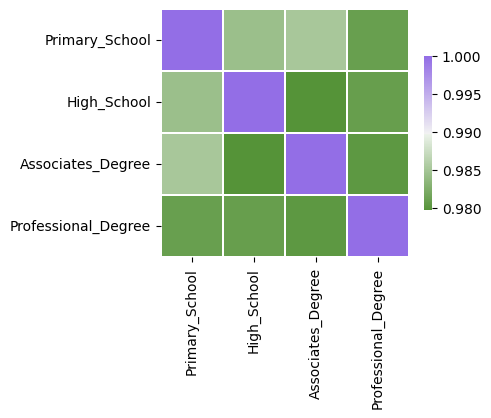

In [312]:
cmap = sns.diverging_palette(120, 275, s=80, l=55, n=9, as_cmap=True)
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
sns.heatmap(df[['Primary_School', 'High_School', 'Associates_Degree', 'Professional_Degree']].corr(),square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, cmap=cmap, ax=ax)

It can be seen by the above corrrelation matrix and heatmap, that although the various forms of education are all quite correlated with one another, the ```Professional_Degree``` provides the least positive correlation with other levels of education. This is supported by the mean unemployment rate of individuals with a Professional Degree being the lowest with 3.127642. It would further support the claim that increasingly higher education levels would increase ones chances of employment.

In [180]:
# Filter for unemployment rates in the year 2020 for Jan-March
is_2020 = df['Year'] == 2020
unmp_2020 = df[is_2020]

# Remove months that contain invalid (NaN/null) unemployment rates
cleaned_unmp_2020 = unmp_2020.dropna()
cleaned_unmp_2020.head()

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
10,2020,Jan,5.5,Jan-2020,3.8,2.8,2.0,3.1,6.0,3.0,4.3,3.3,3.2
21,2020,Feb,5.7,Feb-2020,3.6,3.0,1.9,3.1,5.8,2.5,4.4,3.3,3.1
32,2020,Mar,6.8,Mar-2020,4.4,3.7,2.5,4.0,6.7,4.1,6.0,4.0,4.0


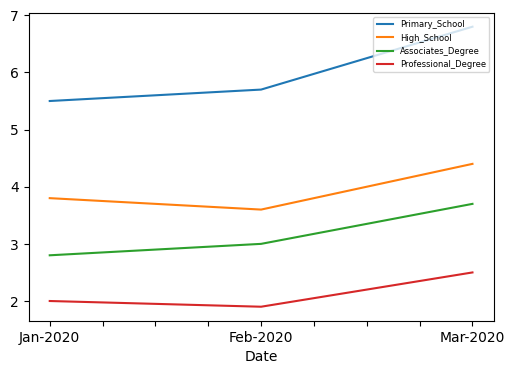

In [308]:
# Turning point in unemployment rates in February
cleaned_unmp_2020.set_index('Date')[['Primary_School', 'High_School', 'Associates_Degree', 'Professional_Degree']].plot(figsize=(6,4))
plt.legend(loc='upper right', prop={'size': 6})

In the above line plot, an upwards turning point can be seen in the unemployment rates near the beginning of February in the year 2020 for all of the education levels. A parallel can be drawn between said turning point and the declaration of Public Health Emergency of International Concern on 30 January 2020 by the World Health Organization (WHO). 

Let us continue to further examine the first quarter of 2020 and impact of the WHO's declaration on State unemployment rates.

In [280]:
# Read in U.S. Individual state unemployment data
df2 = pd.read_csv('./unemployment_data_us_state.csv') 
df2.head()

,State,Month,Unemployment_Rate,Date
0,Alabama,Jan,2.7,Jan-2020
1,Alaska,Jan,6.0,Jan-2020
2,Arizona,Jan,4.5,Jan-2020
3,Arkansas,Jan,3.5,Jan-2020
4,California,Jan,3.9,Jan-2020


In [279]:
# Isolate January, February and March 2020 Unemployment Rates 
jan_2020 = df2[df2['Month'] == 'Jan']
feb_2020 = df2[df2['Month'] == 'Feb']
mar_2020 = df2[df2['Month'] == 'Mar']

Once the ```Unemployment_Rate``` data has been isolated for the months of January, February and March 2020, we can compare the highest averages of the rates among each state using pivot tables.

In [301]:
jan_piv = pd.pivot_table(jan_2020, index = 'State', values = 'Unemployment_Rate').sort_values('Unemployment_Rate', ascending=False)
jan_piv.describe()

,Unemployment_Rate
State,
Alaska,6.0
Mississippi,5.5
D.C.,5.2
Louisiana,5.1
West Virginia,5.0


In [300]:
feb_piv = pd.pivot_table(feb_2020, index = 'State', values = 'Unemployment_Rate').sort_values('Unemployment_Rate', ascending=False)
feb_piv.describe()

,Unemployment_Rate
State,
Wyoming,5.8
Alaska,5.8
Minnesota,5.4
Kentucky,5.2
Delaware,5.2


In [299]:
mar_piv = pd.pivot_table(mar_2020, index = 'State', values = 'Unemployment_Rate').sort_values('Unemployment_Rate', ascending=False)
mar_piv.describe()


,Unemployment_Rate
count,51.000000
mean,4.176471
std,1.125627
min,2.200000
25%,3.300000
50%,4.100000
75%,5.100000
max,6.300000


From the above pivot tables we can see that March has a considerably higher unemployment rate than the other states being 4.176471. If we dive deeper into which state had the highest unemployment rate, we find out it was Nevada!

In [302]:
mar_piv.head()

,Unemployment_Rate
State,
Nevada,6.3
West Virginia,6.1
Louisiana,6.1
D.C.,6.0
Pennsylvania,6.0


From the prior analysis we saw a heavy upturn in unemployment rates in the month of March among all education levels. The first case of COVID-19 was reported in Nevada by a Las Vegas resident on March 5, 2020 (Associated Press, 2020).

When further exploring the industries that would be impartial among all education levels, it makes a level of sense that Nevada would be impacted the most. Nevada is a State that heavily relies on tourism to generate economic growth. As a result of the outbreak, Casino's were among the many non-essential businesses forced to shut down. Gambling and tourism in Nevada is a multi-billion dollar industry, and over 400 Casino's were ordered to close down (Richart et. al, 2020).

#### Dataset Citation:

Shirahatti, A. (2020, April). US Unemployment Dataset (2010 - 2020), Version 2. Retrieved September 13, 2021 from https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-dataset-2010-2020.

#### Research Citation:

Velotta, Richard N.; Schulz, Bailey (2020-03-18). "Nevada casinos closing for 30 days following state order". Las Vegas Review-Journal. Retrieved 2020-03-19.

"Tourist mecca Las Vegas sees Nevada's first coronavirus case". Honolulu Star-Advertiser. Associated Press. March 5, 2020. Retrieved August 28, 2020.